In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print("Librerias importadas")

Librerias importadas


In [2]:
import os
os.listdir('./img/')

['B04.jp2', 'B08.jp2']

In [4]:
#import bands as separate 1 band raster
band4 = rasterio.open('./img/B04_RED.jp2', driver='JP2OpenJPEG')#red
band8 = rasterio.open('./img/B08_NIR.jp2', driver='JP2OpenJPEG') #nir

In [5]:
#number of raster rows
band4.height

10980

In [6]:
#number of raster columns
band4.width

10980

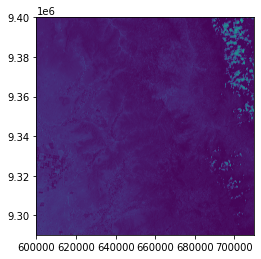

<AxesSubplot:>

In [7]:
#plot band 
plot.show(band4)

In [8]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [9]:
#raster sytem of reference
band4.crs

CRS.from_epsg(32717)

In [10]:
#raster transform parameters
band4.transform

Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 9400000.0)

In [11]:
#raster values as matrix array
band4.read(1)

array([[1457, 1395, 1519, ...,  528,  508,  482],
       [1442, 1474, 1413, ...,  481,  503,  498],
       [1381, 1418, 1435, ...,  449,  467,  484],
       ...,
       [3435, 3326, 3319, ...,  403,  365,  347],
       [3374, 3344, 3331, ...,  412,  376,  338],
       [3357, 3344, 3348, ...,  382,  384,  393]], dtype=uint16)

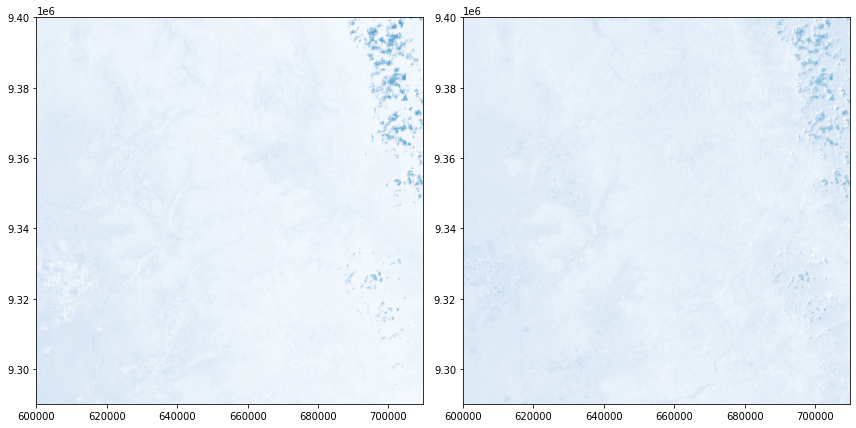

In [12]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band8, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [13]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band8.read(1).astype('float64')

In [14]:
nir

array([[2115., 1977., 2065., ..., 2310., 2581., 2546.],
       [2067., 1999., 2033., ..., 2166., 2407., 2444.],
       [2010., 1987., 2060., ..., 1973., 2012., 2326.],
       ...,
       [3614., 3484., 3438., ..., 3652., 3279., 3255.],
       [3534., 3462., 3442., ..., 3374., 3567., 3461.],
       [3481., 3447., 3446., ..., 3059., 3608., 3545.]])

In [15]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir + red) == 0., 
    0, 
    (nir - red) / (nir + red))
ndvi[:5,:5]

array([[0.18421053, 0.17259786, 0.15234375, 0.15752499, 0.16175255],
       [0.17811342, 0.15116614, 0.17991875, 0.16500994, 0.17737351],
       [0.18549101, 0.1671072 , 0.1788269 , 0.15912898, 0.17717546],
       [0.18695782, 0.1581707 , 0.13772455, 0.13790386, 0.15585136],
       [0.17081644, 0.16001149, 0.17142857, 0.17191283, 0.22679266]])

In [16]:
#export ndvi image
ndviImage = rasterio.open('./img/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

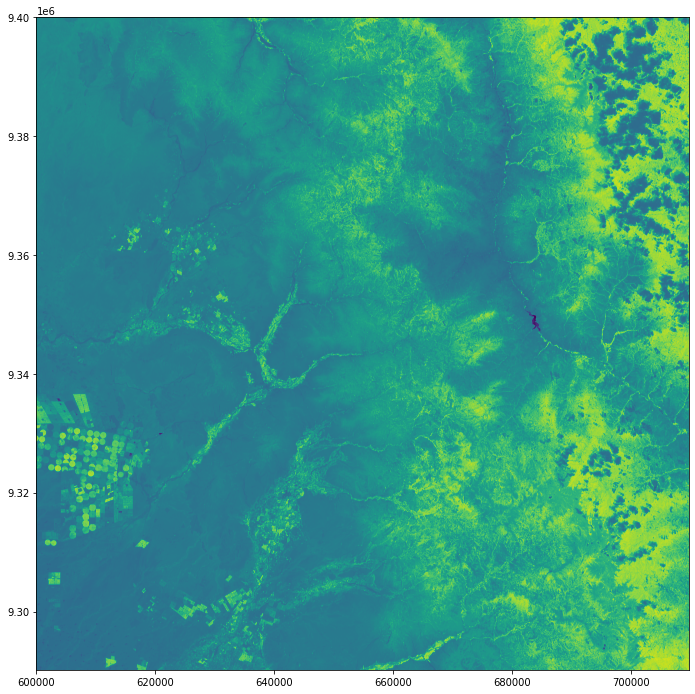

<AxesSubplot:>

In [17]:
#plot ndvi
ndvi = rasterio.open('./img/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)